# Assignment1

### 3.1 Pseudonymisation

Imports

In [836]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [837]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_1151/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 5 NaN and columns with more than 500

In [838]:
df=df.dropna(thresh=23)
df = df.dropna(axis=1, thresh=len(df) - 500)

Display

In [839]:
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong
3,5164.0,Abo Brandon,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|
12,11416.0,Mike Abgarian,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|
20,21053.0,Douglas Acker,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
21,21269.0,Erik Acevedo,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|
22,21685.0,Richard Ablett,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|
422421,385519.0,Dru Miller,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
422518,92194.0,Robert North,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN
422754,539852.0,Ted Worden,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|


In [840]:
df.apply(pd.Series.nunique)

athlete_id    21747
name          21409
gender            2
age              43
height           58
candj           323
snatch          286
deadlift        431
backsq          404
train            74
experience       68
howlong          25
dtype: int64

Text(0.5, 1.0, 'Cardinality')

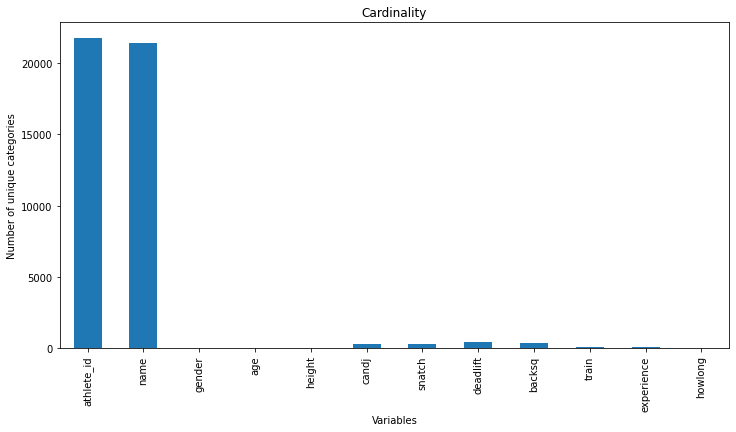

In [841]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [842]:
an = anonymize(df)

display name column and corresponding fake name column

In [843]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Aimee Arnold
12,Mike Abgarian,Marion Taylor-Graham
20,Douglas Acker,Mrs June Ingram
21,Erik Acevedo,Bethan Townsend-Jones
22,Richard Ablett,Thomas Sullivan
...,...,...
422278,Carley Feil,Jane Nixon
422421,Dru Miller,Dale Hammond
422518,Robert North,Mrs Marian Sims
422754,Ted Worden,Dr Joseph Bird


display name athlete_id and corresponding fake id column

In [844]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,PMWI85770068103073
12,11416,NYMG76254769095945
20,21053,QODX96461247227941
21,21269,OFAD08438452815972
22,21685,ZTCY47863589792901
...,...,...
422278,553695,LMPQ60510019112431
422421,385519,AAMW61405537155328
422518,92194,QXRR60901799416583
422754,539852,NFJD53399187405970


### 3.2 Randomisation

In [845]:
from faker import Faker
import random

#### Generate two lists of meaningful names for first and last names

Functions to generate names

Generate 21747(size of data set) random unique first and last names

In [846]:
fake = Faker()

first_names = set()
last_names = set()
while len(first_names) < 690 and len(last_names) < 1000:
    first_names.add(fake.first_name())
    last_names.add(fake.last_name())

first_names_list=list(first_names)
last_names_list=list(last_names)


generate a random name combination

In [847]:
def generate_random_name():
    return f"{random.choice(first_names_list)} {random.choice(last_names_list)}"

In [848]:
num_unique_names = 21747  

random_names = set()
while len(random_names) < num_unique_names:
    random_names.add(generate_random_name())

generate lookup table

In [849]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(random_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))

#get first 8 elements
list(lookup_table.items())[:8]

[('Raymond Donaldson', 'Abo Brandon'),
 ('Yesenia Mccall', 'Mike Abgarian'),
 ('Norman Tanner', 'Douglas Acker'),
 ('Kristin Welch', 'Erik Acevedo'),
 ('Lance Fields', 'Richard Ablett'),
 ('Elijah Blevins', 'Joe Abruzzo'),
 ('Christy Haley', 'Jerry Abadom'),
 ('Tricia Navarro', 'Brigham Abbott')]

replace real names with random ones

In [850]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


try getting the original name from lookup table

In [851]:
lookup_table.get('Curtis Mayer')

### 3.3 Aggregation 

minimum age present is 14 and maximum 56

In [852]:
age_labels = ['10-20', '21-31', '32-42', '43-53', '54-64']
age_bins = [10, 20, 31, 42, 53,64]

In [853]:
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,32-42,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,32-42,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,43-53,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,21-31,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,21-31,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,21-31,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,21-31,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,32-42,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,21-31,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


3.4 Perturbation

In [854]:
import numpy as np

Add Gaussian noise to snatch attribute

In [855]:
def gaussian_noise(df,std_dev):   
   df_with_noise = df.copy()
   noise = np.random.normal(0, std_dev, len(df_with_noise))
   df_with_noise["snatch"] += noise
   display(df_with_noise)
   return df_with_noise

analyze the difference in the distribution

In [856]:
def compare_distributions(df_with_noise):
    print(df['snatch'].describe())
    print("---------With noise ----------")
    print(df_with_noise['snatch'].describe())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df['snatch'], bins=100, color='pink', alpha=0.7)
    plt.title('Original snatch Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(df_with_noise['snatch'], bins=100, color='purple', alpha=0.7)
    plt.title('snatch Distribution with Noise')

    plt.tight_layout()
    plt.show()

The standard deviation is used to determine the amount of noise added. It can be adjusted desired level of noise.

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,32-42,67.0,245.0,178.867127,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,32-42,65.0,290.0,232.048183,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,43-53,72.0,325.0,220.958386,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,21-31,71.0,235.0,134.964937,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,21-31,70.0,187.0,156.626635,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,21-31,67.0,112.0,99.547071,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,21-31,70.0,200.0,175.203008,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,32-42,70.0,185.0,92.416148,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,21-31,69.0,185.0,81.333659,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


count    21327.000000
mean       164.308201
std         57.078105
min          0.000000
25%        132.000000
50%        165.000000
75%        195.000000
max       2225.000000
Name: snatch, dtype: float64
---------With noise ----------
count    21327.000000
mean       165.134771
std         81.370246
min       -134.421377
25%        114.364141
50%        164.658407
75%        215.554102
max       2219.821686
Name: snatch, dtype: float64


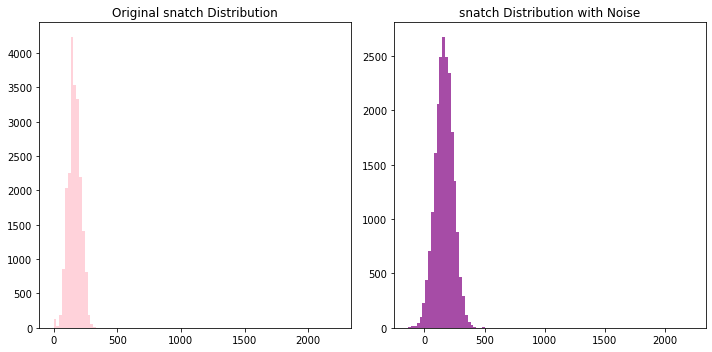

In [857]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
compare_distributions(df_with_noise)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,32-42,67.0,245.0,200.062564,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,32-42,65.0,290.0,225.060970,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,43-53,72.0,325.0,234.817143,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,21-31,71.0,235.0,175.005354,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,21-31,70.0,187.0,133.952142,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,21-31,67.0,112.0,84.115611,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,21-31,70.0,200.0,155.038166,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,32-42,70.0,185.0,135.035159,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,21-31,69.0,185.0,135.174935,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


count    21327.000000
mean       164.308201
std         57.078105
min          0.000000
25%        132.000000
50%        165.000000
75%        195.000000
max       2225.000000
Name: snatch, dtype: float64
---------With noise ----------
count    21327.000000
mean       164.309416
std         57.077523
min         -0.254083
25%        131.969883
50%        164.964541
75%        195.190159
max       2224.967521
Name: snatch, dtype: float64


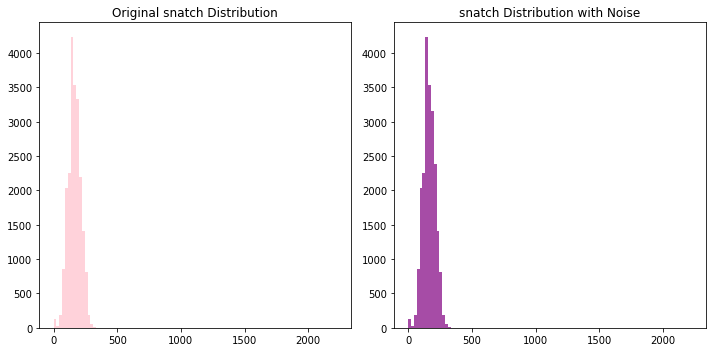

In [858]:
df_with_noise=gaussian_noise(df,0.1)
compare_distributions(df_with_noise)

# 3.5 Data Analysis

mean squared error function

In [859]:
def analyze_information_loss(original_data, noisy_data):
     squared_error = (original_data - noisy_data) ** 2
     return np.sum(squared_error) / original_data.size

Total Variation Distance as a similarity measure

In [860]:
def total_variation_distance(original_data, noisy_data):   
    return 0.5 * np.sum(np.abs(original_data - noisy_data))


Results

In [868]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,32-42,67.0,245.0,172.401591,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,32-42,65.0,290.0,204.091468,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,43-53,72.0,325.0,182.246934,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,21-31,71.0,235.0,155.957828,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,21-31,70.0,187.0,110.564010,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,21-31,67.0,112.0,72.705095,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,21-31,70.0,200.0,17.920882,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,32-42,70.0,185.0,72.673404,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,21-31,69.0,185.0,147.789636,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


MSE: 3168.1130199865033
total variation distance: 485458.05542796076


Results with less std deviation

In [869]:
df_with_noise=gaussian_noise(df,0.1)
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Raymond Donaldson,Male,32-42,67.0,245.0,200.090915,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Aimee Arnold,PMWI85770068103073
12,11416,Yesenia Mccall,Male,32-42,65.0,290.0,224.930241,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Marion Taylor-Graham,NYMG76254769095945
20,21053,Norman Tanner,Male,43-53,72.0,325.0,234.991003,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Mrs June Ingram,QODX96461247227941
21,21269,Kristin Welch,Male,21-31,71.0,235.0,174.949351,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Bethan Townsend-Jones,OFAD08438452815972
22,21685,Lance Fields,Male,21-31,70.0,187.0,134.035574,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Thomas Sullivan,ZTCY47863589792901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Yolanda Rocha,Female,21-31,67.0,112.0,83.899172,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Jane Nixon,LMPQ60510019112431
422421,385519,Sheena Harper,Male,21-31,70.0,200.0,155.028360,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dale Hammond,AAMW61405537155328
422518,92194,Howard Wood,Male,32-42,70.0,185.0,135.088104,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Mrs Marian Sims,QXRR60901799416583
422754,539852,Jade Alvarado,Male,21-31,69.0,185.0,135.076673,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Joseph Bird,NFJD53399187405970


MSE: 0.009721919243526816
total variation distance: 846.5431851437207
